In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv('height-weight.csv')

In [7]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

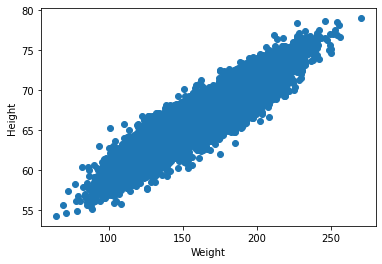

In [9]:
##Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [11]:
## Finding correlation between X and Y. Is it +ve or -Ve
df.corr()
# it is highly correlated the values are near to 1

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


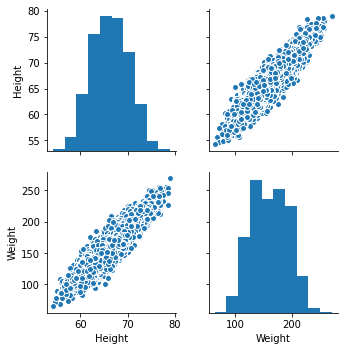

In [13]:
# seaborn for visulalization
import seaborn as sns
sns.pairplot(df)

In [27]:
# dicide the featurers into dependent and independent features
X=df[['Weight']] # Always the independent feature should be a dataframe or 2-D array
y=df['Height']# dependent feature can be of series type or 1d array


In [28]:
type(X)

pandas.core.frame.DataFrame

In [29]:
X.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [30]:
X_series=df['Weight']
type(X_series)

pandas.core.series.Series

In [31]:
np.array(X_series).shape

(10000,)

In [32]:
type(y)

pandas.core.series.Series

In [33]:
np.array(y).shape

(10000,)

In [34]:
# Train, Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
X_train.shape

(7500, 1)

In [38]:
# Standardization only the inout feature
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

In [42]:
X_test

array([[ 0.58580317],
       [ 0.4652773 ],
       [ 1.02596093],
       ...,
       [-0.89738552],
       [-1.02716418],
       [ 0.55544751]])

In [43]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [44]:
regression = LinearRegression()

In [45]:
regression.fit(X_series,y)

ValueError: Expected 2D array, got 1D array instead:
array=[241.8935632 162.3104725 212.7408556 ... 128.4753188 163.8524613
 113.6491027].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [47]:
regression.fit(X_train, Y_train)

LinearRegression()

In [55]:
print("Coefficient or Slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or Slope:  [3.59725817]
Intercept:  66.34083243469466


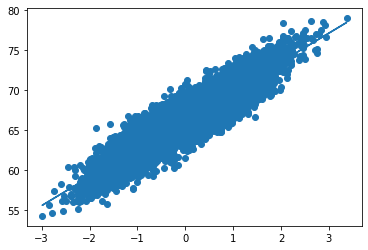

In [58]:
# Plot the Training data plot best fit line
plt.scatter(X_train, Y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction of test data
1. Predicted height output = intercept + coef_(weights)
2. y_pred_test = 66.34 + 3.6(X_test)

In [60]:
# Prediction for the test Data
y_pred = regression.predict(X_test)